In [1]:
from gensim.models import Word2Vec
import os 
from sklearn.decomposition import PCA
import re
from pprint import pprint

import matplotlib.pyplot as pyplot
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties
from wxconv import WXC


In [4]:

input_path='/home/turning/Desktop/CL_PROJECT_CODE/Teamwise_dataset/'
list_files=[]
for x in os.listdir(input_path):
    if x.endswith(".txt"):
        list_files.append(input_path+x)


corpus=""
cleaned_corpus=""
for file_path in list_files:
	f=open(file_path,'r')
	corpus+=f.read()

corpus = re.sub('▁-', " " , corpus)
corpus = re.sub('[A-Za-z]', "" , corpus)
corpus = re.sub('[0-9]', "" ,corpus)

for x in corpus:
    if x != ',':
        cleaned_corpus+=x

sentences=cleaned_corpus.split("\n")

for i in range(len(sentences)):
    sentences[i]=sentences[i].replace("।","")
    sentences[i]=sentences[i].replace("?","")

    sentences[i]=sentences[i].split()



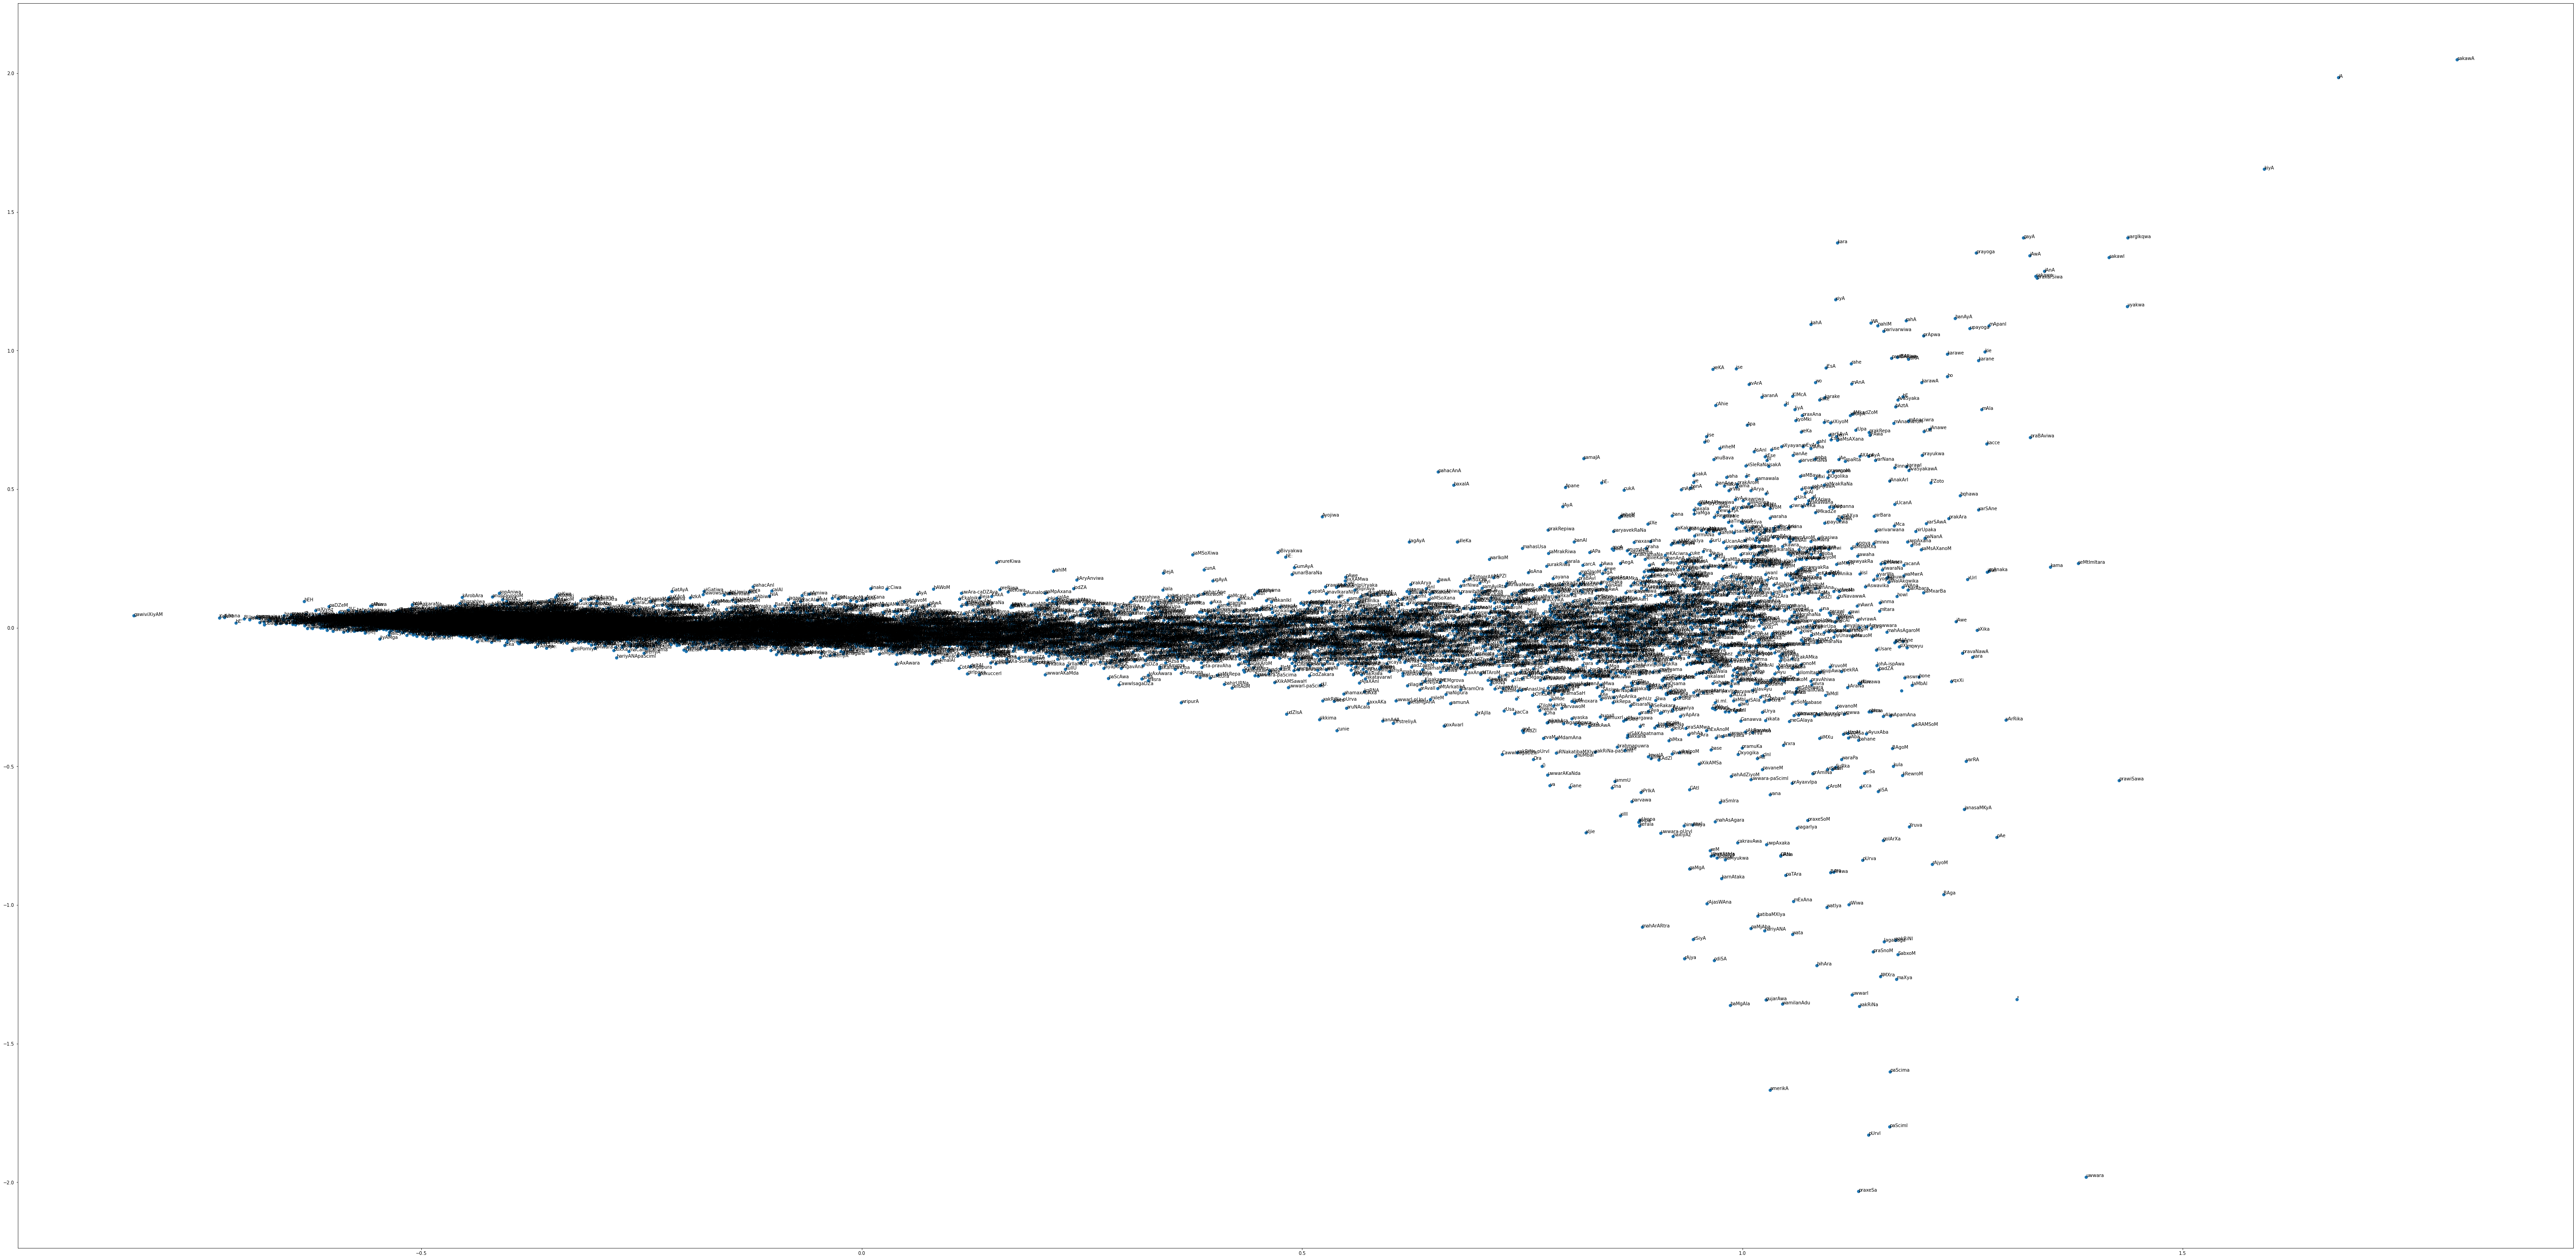

In [3]:

# train model
model = Word2Vec(sentences, min_count=1 ,vector_size=1000,sg=1)
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=3)
result = pca.fit_transform(X)
plt_1 = pyplot.figure(figsize=(100, 50))
# create a scatter plot of the projection
con = WXC(order='utf2wx')
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
# print(result)
for i, word in enumerate(words):
	pyplot.annotate(con.convert(word), xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [9]:
model.wv.most_similar(positive=['एक'])

[('उस', 0.9736377000808716),
 ('समान', 0.9692274928092957),
 ('धरातल', 0.9684513807296753),
 ('ग्लोब', 0.9679691195487976),
 ('किसी', 0.9625663161277771),
 ('छोटा', 0.9619497656822205),
 ('बिंदु', 0.9614579677581787),
 ('वास्तविक', 0.9609476923942566),
 ('समस्या', 0.9606859683990479),
 ('मान', 0.959968626499176)]